In [1]:
import numpy as np
import xarray as xr

%matplotlib inline
from matplotlib import pyplot as plt

import stagem1.temporal_integration as sti
import xsimlab as xs

### Main parameters

In [60]:
#Main parameters
d2s=86400 #24h in s
h2s=3600  #1h in s
w2=2*np.pi/(12*3600) #wave pulsation
km=1e3
dt=1*h2s # model step
L=100*km
k2=2*np.pi/L

um=0.1
uw=0.1
w=w2
k=k2


### Add trajectories on velocity fieldvelocity 

#### Trajectories for several particules

In [61]:
x=sti.SetUp(advected=0)

In [62]:
x.out_ds

<xarray.Dataset>
Dimensions:             (a: 100, otime: 143, time: 144)
Coordinates:
  * a                   (a) float64 0.0 2.02e+03 4.04e+03 ... 1.98e+05 2e+05
  * otime               (otime) int64 0 3600 7200 10800 ... 504000 507600 511200
  * time                (time) int64 0 3600 7200 10800 ... 507600 511200 514800
    otime_day           (otime) float64 0.0 0.04167 0.08333 ... 5.875 5.917
Data variables:
    init__N             int64 100
    init__maxi          float64 2e+05
    init__mini          int64 0
    position__p         (otime, a) float64 0.0 2.02e+03 ... 2.51e+05 2.532e+05
    velocity__advected  int64 0
    velocity__k         float64 6.283e-05
    velocity__um        float64 0.1
    velocity__uw        float64 0.1
    velocity__v         (otime, a) float64 0.2 0.1992 0.1968 ... 0.05568 0.06803
    velocity__w         float64 0.0001454
    position_km         (otime, a) float64 0.0 2.02 4.04 ... 248.9 251.0 253.2
    displacement        (otime, a) float64 0.0 0.0 0.0 ... 5.305e+04 5.315e+04

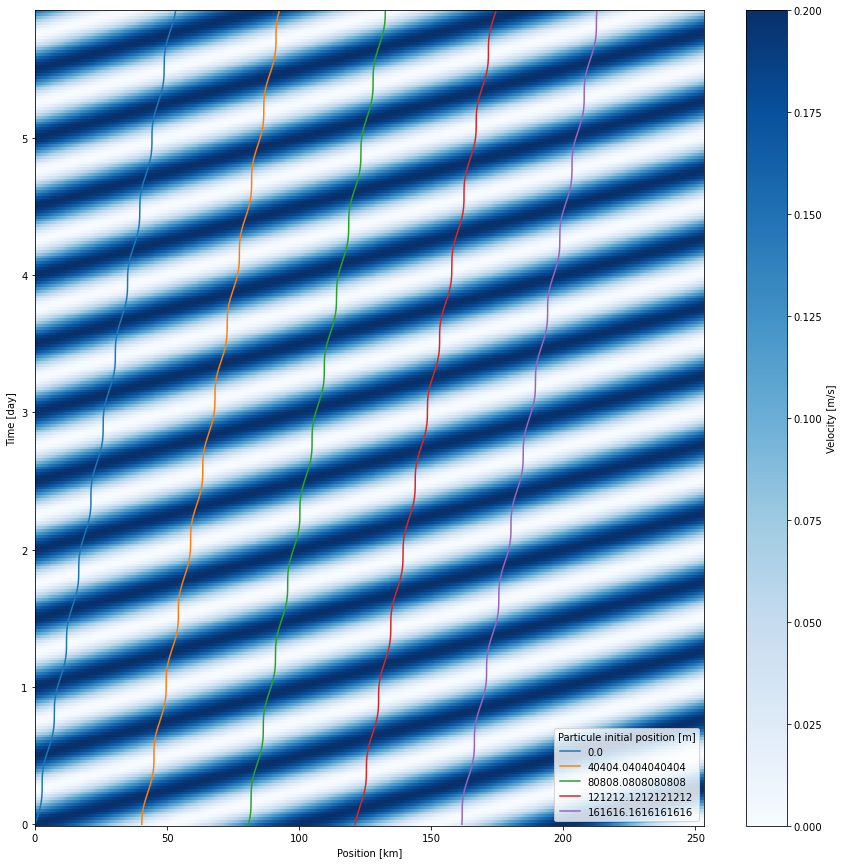

In [63]:
x.velocity_field().plot(y='t', figsize=(15,15), cmap='Blues')
x.out_ds.position_km.isel(a=slice(0,None,20)).plot(y='otime_day', hue='a')

#### Trajectories for different integration methods

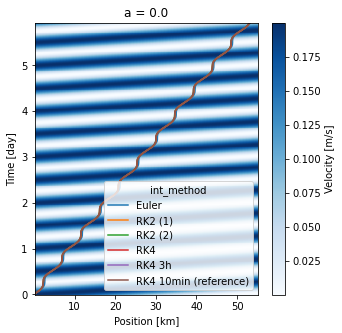

In [14]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=x.velocity_field()
vf=vf.where(vf.x.where(vf.x<55,  drop=True)>0, drop=True)
fg=vf.plot(y='t',figsize=(5,5), cmap='Blues')
compx.ds.position_km.isel(a=0).plot(y="otime_day",hue="int_method", ax=fg.axes)


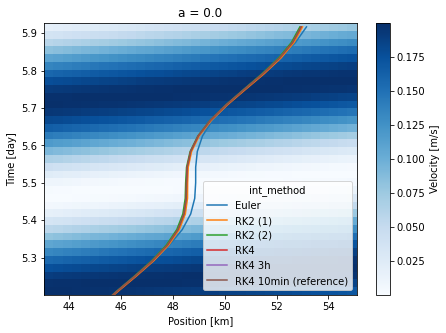

In [15]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=vf.where(vf.t>5.2, drop=True).where(vf.x.where(vf.x<55,  drop=True)>43, drop=True)
fg=vf.plot(y='t',figsize=(7,5), cmap='Blues')
compx.ds.position_km.isel(a=0).plot(y="otime_day",hue="int_method", ax=fg.axes)


# Unadvected Case
## uw+um=w/k
### uw=w/k-um

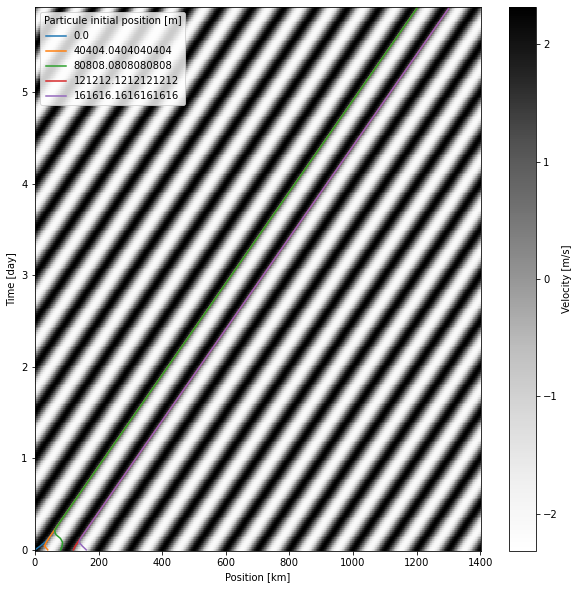

In [16]:
y=sti.SetUp(advected=0)
y.update_model(int_method=sti.Runge_Kutta4)
y.update_parameters(velocity__uw=w2/k2-um)
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a')

### um=w/k-uw

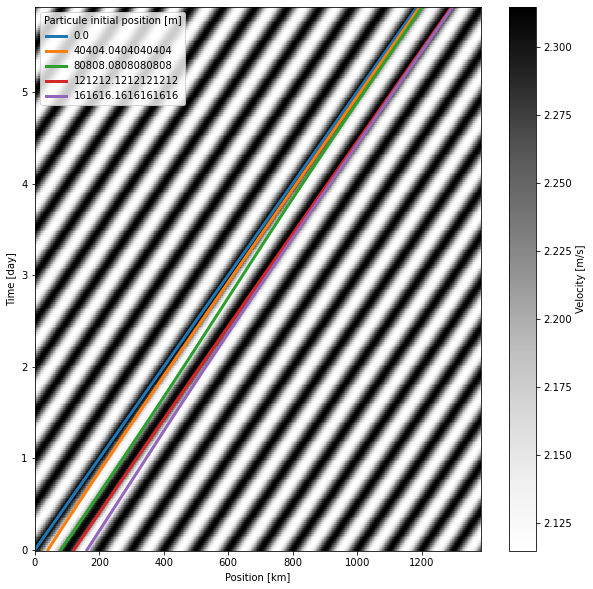

In [17]:
y=sti.SetUp(advected=0)
y.update_parameters(velocity__um=w2/k2-uw)
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')

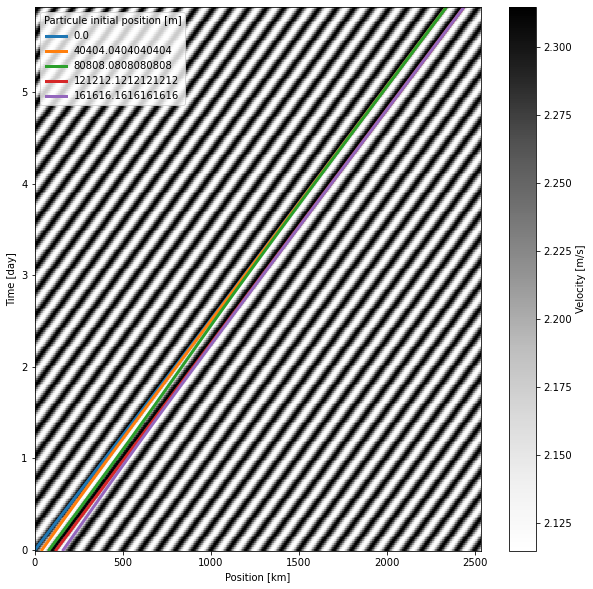

In [66]:
y=sti.SetUp(advected=1)
y.update_model(int_method=sti.Runge_Kutta4)
y.update_parameters(velocity__um=y['w']/y['k']-uw)
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')

### w=k(uw+um)

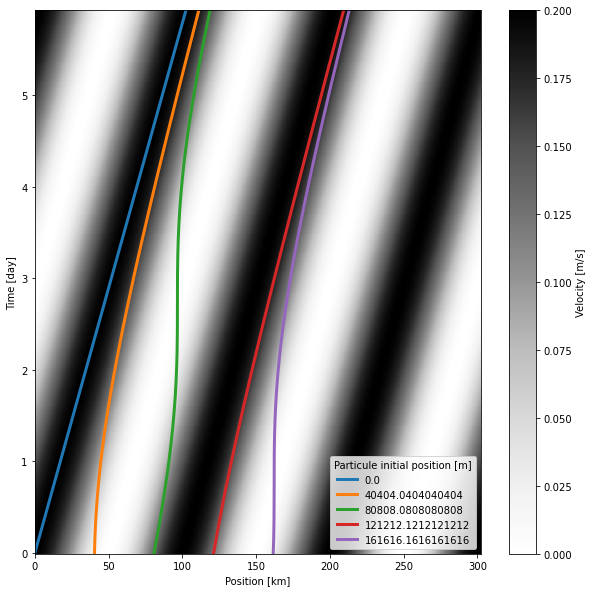

In [19]:
y=sti.SetUp(advected=0)
y.update_parameters(velocity__w=k2*(um+uw))
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')

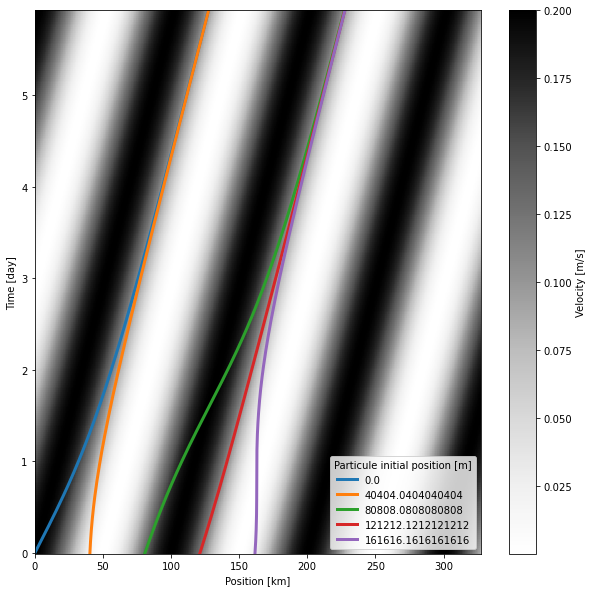

In [20]:
y=sti.SetUp(advected=0)
y.update_model(int_method=sti.Runge_Kutta4)
y.update_parameters(velocity__w=k2*(um+uw))
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')

### k=w/(uw+um)

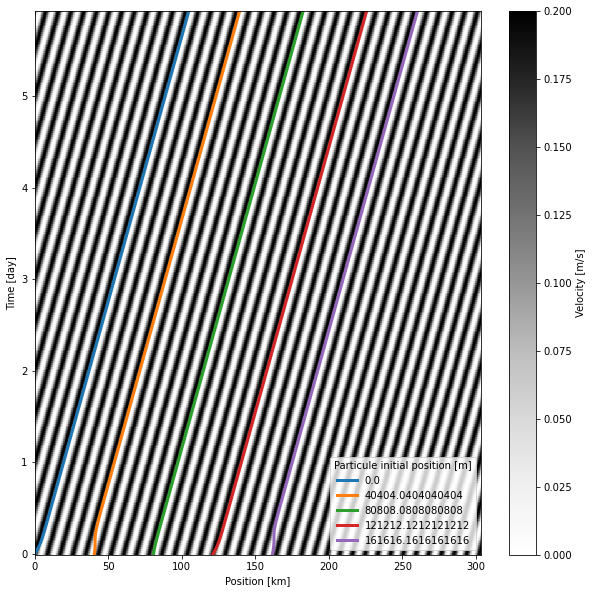

In [22]:
y=sti.SetUp(advected=0)
y.update_model(int_method=sti.Runge_Kutta4)
y.update_parameters(velocity__k=w2/(um+uw))
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')

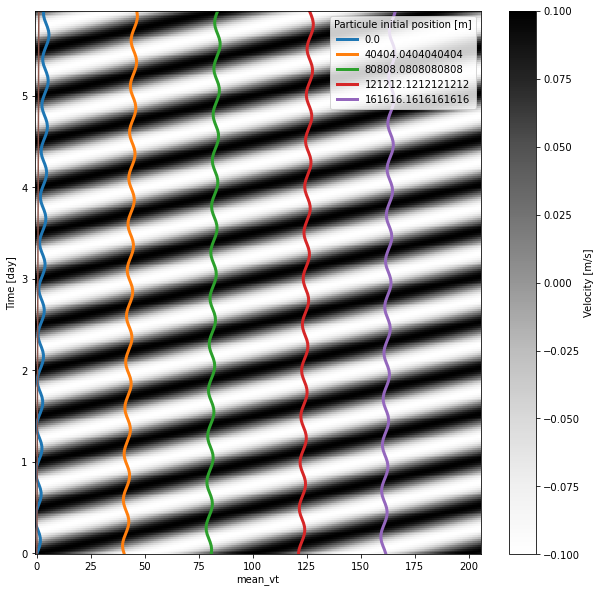

In [25]:
y=sti.SetUp(advected=0)
y.update_model(int_method=sti.Runge_Kutta4)
y.update_parameters(velocity__um=0)
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')
y.out_ds['mean_vt']=mean_v(y)*y.out_ds.otime/1000
y.out_ds.mean_vt.plot(y='otime_day')

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


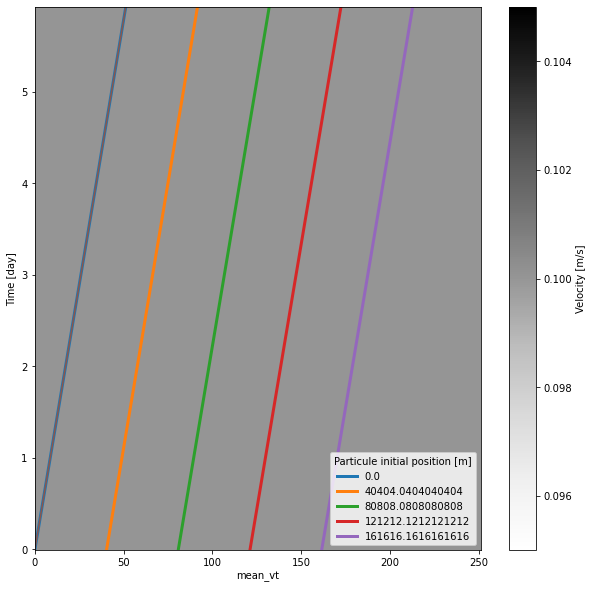

In [68]:
y=sti.SetUp(advected=0)
y.update_parameters(velocity__uw=0)
y.update_model(intmethod=sti.Runge_Kutta2)
y.out_ds['mean_vt']=y['um']*y.out_ds.otime/1000
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')
y.out_ds.mean_vt.plot(y='otime_day')

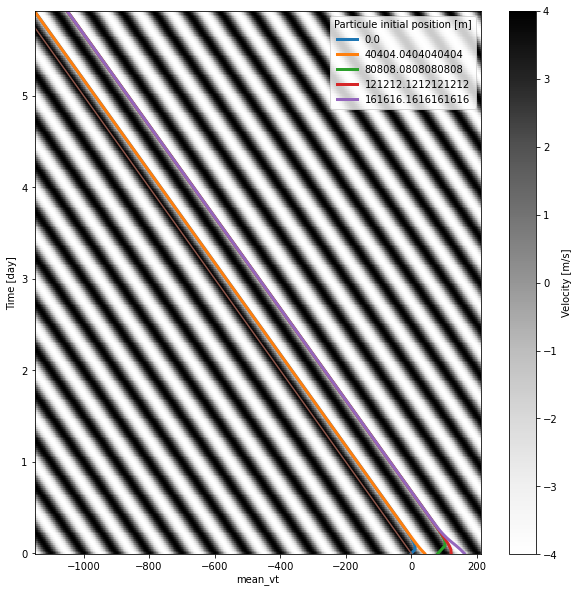

In [85]:
y=sti.SetUp(advected=0)
y.update_parameters(velocity__um=0, velocity__uw=4, velocity__k=-k2)
y.update_model(intmethod=sti.Runge_Kutta4)
y.out_ds['mean_vt']=y['w']/y['k']*y.out_ds.otime/1000
#y.out_ds['mean_vt']=1*y.out_ds.otime/1000
y.velocity_field().plot(y='t',figsize=(10,10), cmap='Greys')
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day',lw=3, hue='a')
y.out_ds.mean_vt.plot(y='otime_day')

In [52]:
def mean_v(x):
    return (x['um']-(x['um']**2-x['uw']**2/2)*x['k']/x['w'])/(1-x['um']*x['k']/x['w']) 
y.out_ds.isel(a=0)

<xarray.Dataset>
Dimensions:             (otime: 143, time: 144)
Coordinates:
    a                   float64 0.0
  * otime               (otime) int64 0 3600 7200 10800 ... 504000 507600 511200
  * time                (time) int64 0 3600 7200 10800 ... 507600 511200 514800
    otime_day           (otime) float64 0.0 0.04167 0.08333 ... 5.875 5.917
Data variables: (12/13)
    init__N             int64 100
    init__maxi          float64 2e+05
    init__mini          int64 0
    position__p         (otime) float64 0.0 360.0 720.0 ... 5.076e+04 5.112e+04
    velocity__advected  int64 0
    velocity__k         float64 6.283e-05
    ...                  ...
    velocity__uw        int64 0
    velocity__v         (otime) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    velocity__w         float64 0.0001454
    position_km         (otime) float64 0.0 0.36 0.72 1.08 ... 50.4 50.76 51.12
    displacement        (otime) float64 0.0 360.0 720.0 ... 5.076e+04 5.112e+04
    mean_vt             (otime) float64 0.0 0.36 0.72 1.08 ... 50.4 50.76 51.12